In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pyvista as pv
from scipy.interpolate import Rbf
from launch.vulcan_handler import VulcanHandler
from intervul.readpos import VulcanPosMesh
from launch.Funciones import *
import time

In [ ]:
Direccion = 'Casos/Biaxial Demiray/'
malla = 'Biaxial3D.msh'
mesh = pv.read(Direccion+malla)

direccion = 'SVD/Biaxial/'

A_D = np.loadtxt(direccion+ 'Coefeicientes_Desplazamientos.txt')
A_T = np.loadtxt(direccion+ 'Coefeicientes_Gradientes.txt')
fhi_D = np.loadtxt(direccion+ 'Modos_Gradientes.txt')
fhi_T = np.loadtxt(direccion+ 'Modos_Desplazamientos.txt')

# POD

In [ ]:
caso = 10

Tensiones_POD = ManejoDatos(np.matmul(fhi_T,A_T[:,caso *  31+30]),6).Magnitud()
Desplazamientos_POD =  ManejoDatos(np.matmul(fhi_D,A_D[:,caso *  31+30]),3).Magnitud()

mesh['Magnitud Tensiones POD 5 Modos'] = Tensiones_POD
mesh.set_active_scalars('Magnitud Tensiones POD 5 Modos')
mesh.plot()

Widget(value="<iframe src='http://localhost:42845/index.html?ui=P_0x7ff65c4ec040_0&reconnect=auto' style='widt…

# Simulacion FEM

In [4]:
constantes = []
constantes1 = np.linspace(0.02,0.2,18)
constantes2 = np.linspace(0.3,1.5,12)

for i in constantes1:
    for j in constantes2:
        constantes.append([i,j])

In [16]:
cons1 =   0.14 #constantes[caso][0]
cons2 =   1.11 #constantes[caso][1] 
penal =  cons1*1000
        
param = {'Cons1': cons1,'Cons2': cons2,'Penal': penal }
caso1 = VulcanHandler(['Casos/Uniaxial_Demiray/Traccion_demiray_uniaxial.dat',
                       'Casos/Uniaxial_Demiray/Traccion_demiray_uniaxial.geo', 
                       'Casos/Uniaxial_Demiray/Traccion_demiray_uniaxial.fix'],
                       'TraccionD')
inicio = time.time()                    
caso1.run(param)
final = time.time()
print((final-inicio)/60)
disp, stress = get_results(caso1.pathToPos()) 


desplazamientos_FEM = disp[-1].reshape(-1)
Mag_desplazamientos_FEM = ManejoDatos(desplazamientos_FEM,3).Magnitud()
Mag_Tensiones_FEM = ManejoDatos(stress[-1].reshape(-1),6).Magnitud()
mesh['Magnitud Desplazamiento FEM'] = Mag_desplazamientos_FEM
mesh['Magnitud Tensiones FEM'] = Mag_Tensiones_FEM


0.4987396081288656


In [17]:
mesh.set_active_scalars('Magnitud Tensiones FEM')
mesh.plot()

Widget(value="<iframe src='http://localhost:42845/index.html?ui=P_0x7ff6484f5780_7&reconnect=auto' style='widt…

In [11]:
mesh.set_active_scalars('Magnitud Desplazamiento FEM')
mesh.plot()

Widget(value="<iframe src='http://localhost:42845/index.html?ui=P_0x7ff6484d4cd0_5&reconnect=auto' style='widt…

# POD - RBF

In [12]:
Entrada = []
for i in constantes:
    for j in range(31):
        aux = i.copy()
        aux.append(j*(6/30))
        Entrada.append(aux)
        
Entrada = np.array(Entrada)

rbfi_D = Rbf(Entrada[:,0], Entrada[:,1],Entrada[:,2], A_D.T,function = 'inverse', mode = 'N-D')
rbfi_T = Rbf(Entrada[:,0], Entrada[:,1],Entrada[:,2], A_T.T,function = 'inverse', mode = 'N-D')

In [40]:
inicio = time.time()


a_d = rbfi_D(0.14,1.11,6)
a_t = rbfi_T(0.14,1.11,6)

desp = np.matmul(fhi_D,a_d)
ten = np.matmul(fhi_T,a_t)

final = time.time()

print((final-inicio)/60)

Magnitud_desp_POD_RBF = ManejoDatos(desp,3).Magnitud()
Magnitud_ten_POD_RBF = ManejoDatos(ten,6).Magnitud()

7.9651673634847e-05


In [33]:
mesh['Magnitud Desplazamiento POD-RBF'] = Magnitud_desp_POD_RBF
mesh['Magnitud Tensiones POD-RBF'] = Magnitud_ten_POD_RBF

In [35]:
mesh.set_active_scalars('Magnitud Tensiones POD-RBF')
mesh.plot()

Widget(value="<iframe src='http://localhost:42845/index.html?ui=P_0x7ff59c3f18d0_10&reconnect=auto' style='wid…

# Error

In [26]:
errores = []
for it,i in enumerate(Mag_Tensiones_FEM):
    y_teo = Mag_Tensiones_FEM[it]
    y_exp = Magnitud_ten_POD_RBF[it]
    #y_exp = Tensiones_POD[it]
    error = (abs((y_teo - y_exp)/y_teo) )*100 
    errores.append(error)
    
    
print('Error Promedio', round(np.mean(errores),10),'%')
mesh['Error POD-RBF'] = errores 
mesh.set_active_scalars('Error POD-RBF')
mesh.plot()

Error Promedio 0.3888987076 %


Widget(value="<iframe src='http://localhost:42845/index.html?ui=P_0x7ff59c3a0850_9&reconnect=auto' style='widt…

 JS Error => TypeError: this is null
 JS Error => error: TypeError: this.openglRenderWindow is null
 JS Error => TypeError: this is null
 JS Error => error: TypeError: this.openglRenderWindow is null
 JS Error => TypeError: this is null
 JS Error => error: TypeError: this.openglRenderWindow is null
 JS Error => TypeError: this is null
 JS Error => error: TypeError: this.openglRenderWindow is null


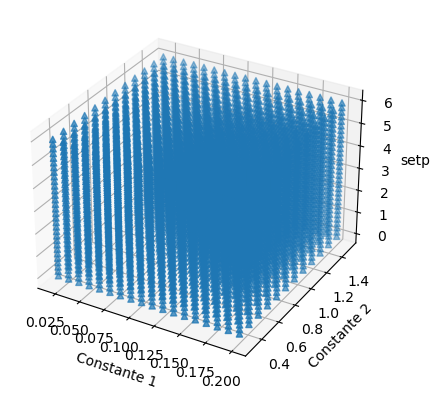

In [25]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


ax.scatter(Entrada[:,0], Entrada[:,1] , Entrada[:,2], marker=m)

ax.set_xlabel('Constante 1')
ax.set_ylabel('Constante 2')
ax.set_zlabel('setp')

plt.show()

In [41]:
0.4987396081288656 / 0.0004083593686421712


1221.3252503235476